# Midterm Exam

## Grading Rubric

Each question is worth 20 points. The answer to each question will be graded in terms of:


* Correct Analysis & Computation `(8 points)`
  - Correct use of pandas operations (groupby, aggregation, filtering).
  - Accurate statistics or summaries.

* Appropriate Use of Visuals / Tables — `(6 points)`
  - Visualization or table is relevant to the question.
  - Plot type is appropriate (bar, boxplot, line, etc.).
  - Labels and axes are clear.


* Interpretation and Reasoning — `(6 points)`
  - Conclusions are clearly stated.
  - Interpretations are supported by data.
  - Reasoning is logical and coherent.

## Variable Definitions

* **hotel**
  - H1 = Resort Hotel
  - H2 = City Hotel

* **is_canceled** - Value indicating if the booking was canceled.
  - (1) canceled
  - (0) not canceled

* **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* **arrival_date_year** - Year of arrival date

* **arrival_date_month** - Month of arrival date

* **arrival_date_week_number** - Week number of year for arrival date

* **arrival_date_day_of_month** - Day of arrival date

* **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* **adults** - Number of adults

* **children** - Number of children

* **babies** - Number of babies

* **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages:
  - Undefined/SC – no meal package.
  - BB – Bed & Breakfast.
  - HB – Half board (breakfast and one other meal – usually dinner).
  - FB – Full board (breakfast, lunch and dinner)

* **country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format

* **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **is_repeated_guest** - Value indicating if the booking name was from a repeated guest.
  - 1 is a repeated guest.
  - 0 is not a repeated guest.

* **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking

* **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

* **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* **assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* **booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

  - No Deposit – no deposit was made.
  - Non Refund – a deposit was made in the value of the total stay cost.  
  - Refundable – a deposit was made with a value under the total cost of stay.

* **agent** - ID of the travel agency that made the booking

* **company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer

* **customer_type** - Type of booking, assuming one of four categories:   

  - Contract - when the booking has an allotment or other type of contract associated to it.
  - Group – when the booking is associated to a group.
  - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
  - Transient-party – when the booking is transient, but is associated to at least other transient booking

* **adr** - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* **required_car_parking_spaces** - Number of car parking spaces required by the customer

* **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)

* **reservation_status** - Reservation last status, assuming one of three categories:
  - Canceled – booking was canceled by the customer.
  - Check-Out – customer has checked in but already departed.
  - No-Show – customer did not check-in and did inform the hotel of the reason why

* **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'hotel-booking-demand' dataset.
Path to dataset files: /kaggle/input/hotel-booking-demand


In [ ]:
import os
import pandas as pd

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Dataset Overview & Core Distributions `(20 points)`

**Question:** What do the shapes and spread of the `lead_time` and `adr` distributions suggest about typical booking behavior and extreme cases in this dataset?

Perform an exploratory analysis of the distributional characteristics of key numerical variables in the hotel booking dataset.

You must:
- Analyze the distribution of lead_time and adr
- Use appropriate summary statistics and visualizations to support your analysis
- Identify any skewness and/or outliers in these variables

           lead_time            adr
count  119390.000000  119390.000000
mean      104.011416     101.831122
std       106.863097      50.535790
min         0.000000      -6.380000
25%        18.000000      69.290000
50%        69.000000      94.575000
75%       160.000000     126.000000
max       737.000000    5400.000000

skewness:
 lead_time     1.346550
adr          10.530214
dtype: float64


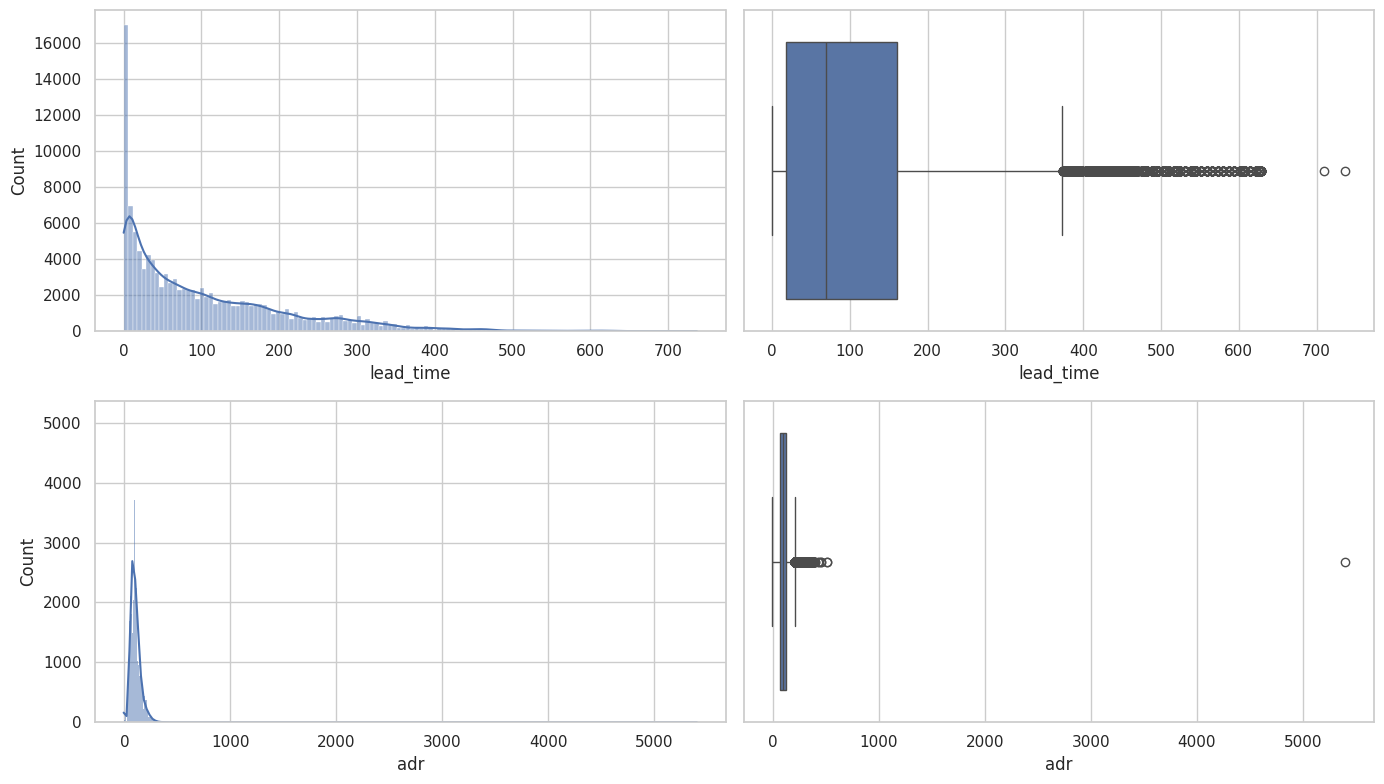

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# summary statistics
print(df[["lead_time", "adr"]].describe())

# check skewness
print("\nskewness:\n", df[["lead_time", "adr"]].skew())

# plot setup
fig, ax = plt.subplots(2, 2, figsize=(14, 8))

# lead time visuals
sns.histplot(df["lead_time"], kde=True, ax=ax[0,0])
sns.boxplot(x=df["lead_time"], ax=ax[0,1])

# adr visuals
sns.histplot(df["adr"], kde=True, ax=ax[1,0])
sns.boxplot(x=df["adr"], ax=ax[1,1])

plt.tight_layout()
plt.show()

## 2. Booking Cancellations and Lead Time `(20 points)`

**Question**: Do bookings with longer lead times tend to cancel more often?

Analyze how `lead_time` differs between canceled and non-canceled bookings.

You must:
- Compute appropriate summary statistics
- Use at least one visualization
- Clearly describe the pattern you observe



               count        mean         std  min   25%    50%    75%    max
is_canceled                                                                 
0            75166.0   79.984687   91.109888  0.0   9.0   45.0  124.0  737.0
1            44224.0  144.848815  118.624829  0.0  48.0  113.0  214.0  629.0


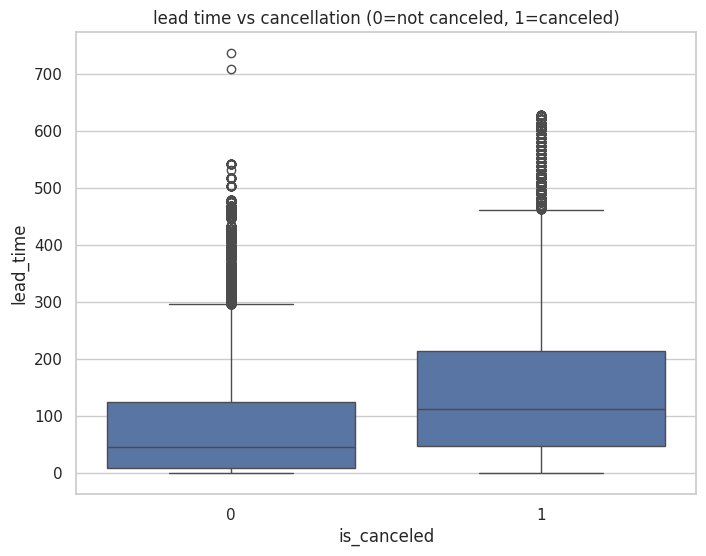

In [ ]:
# group data by cancellation status and get stats
print(df.groupby("is_canceled")["lead_time"].describe())

# visualize the difference
plt.figure(figsize=(8, 6))
sns.boxplot(x="is_canceled", y="lead_time", data=df)
plt.title("lead time vs cancellation (0=not canceled, 1=canceled)")
plt.show()

## 3. Seasonality and Pricing `(20 points)`

**Question**: Do `Resort Hotels` and `City Hotels` exhibit different seasonal pricing behaviors throughout the year? If so, during which months are these differences most pronounced?

Analyze how Average Daily Rate (ADR) varies across arrival months, and compare this pattern between Resort Hotels and City Hotels.

You must:
- Aggregate ADR by month and hotel type
- Use a visualization to support your analysis
- Identify at least one seasonal pricing pattern

hotel               City Hotel  Resort Hotel
arrival_date_month                          
January              82.628986     49.461883
February             85.088278     55.171930
March                92.643116     57.520147
April               111.251838     77.849496
May                 121.638560     78.758134
June                119.074341    110.444749
July                110.734292    155.181299
August              114.680455    186.790574
September           110.004661     93.252030
October              99.974498     62.097617
November             88.069601     48.273993
December             88.826307     68.984230


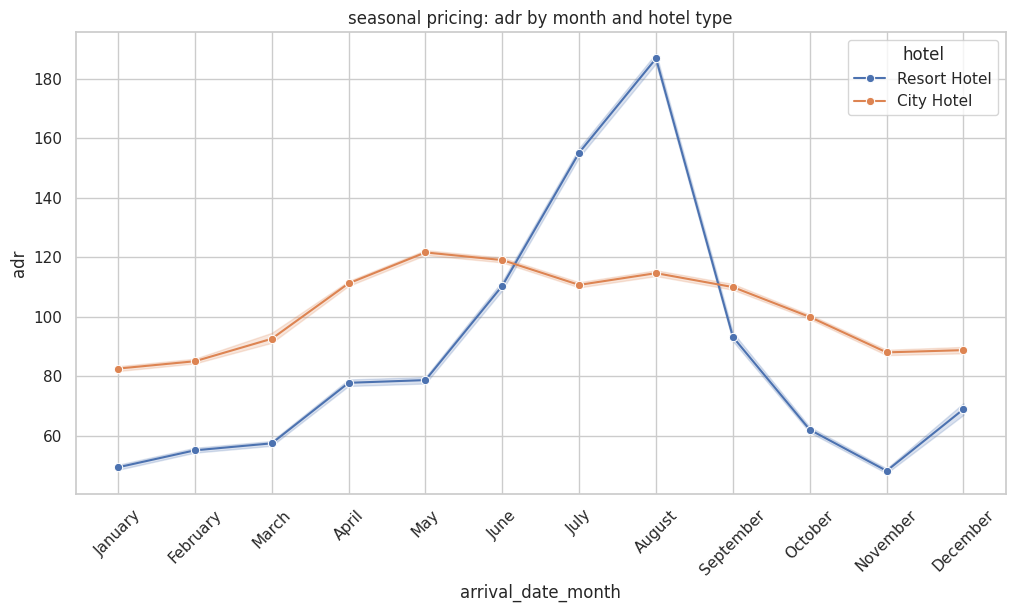

In [ ]:
# order months correctly
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"
]

df["arrival_date_month"] = pd.Categorical(df["arrival_date_month"], categories=months, ordered=True)

# aggregate average adr by month and hotel
print(df.groupby(["arrival_date_month", "hotel"], observed=False)["adr"].mean().unstack())

# visualize seasonality with a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="arrival_date_month", y="adr", hue="hotel", data=df, marker="o")
plt.title("seasonal pricing: adr by month and hotel type")
plt.xticks(rotation=45)
plt.show()

## 4. Customer Behavior `(20 points)`

**Question:** Do repeated guests behave differently from first-time guests?

Compare repeated guests and non-repeated guests in terms of:
- Cancellation rate
- Booking behavior (e.g., booking changes or lead time)
- Use summary statistics and/or visualizations to support your answer.


                   is_canceled   lead_time  booking_changes
is_repeated_guest                                          
0                     0.377851  106.425221         0.219692
1                     0.144882   30.786352         0.264567


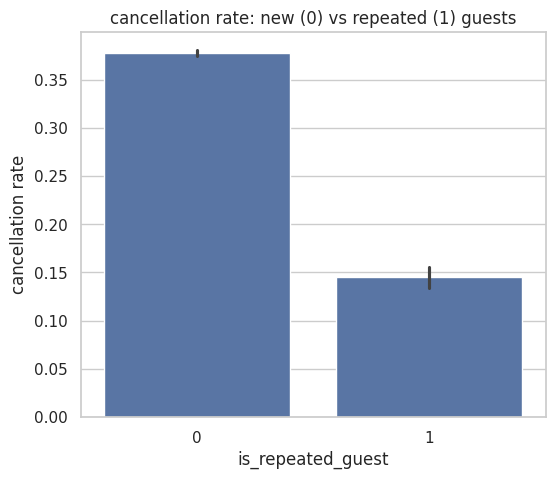

In [ ]:
# compare repeated vs non-repeated guests
# 0 = new guest, 1 = repeated guest
print(df.groupby("is_repeated_guest")[["is_canceled", "lead_time", "booking_changes"]].mean())

# visualize cancellation rate difference
plt.figure(figsize=(6, 5))
sns.barplot(x="is_repeated_guest", y="is_canceled", data=df)
plt.title("cancellation rate: new (0) vs repeated (1) guests")
plt.ylabel("cancellation rate")
plt.show()

## 5. Booking Cancellation Insights `(20 points)`

**Question:** Which combination of variables appears to have the strongest relationship with booking cancellations, and how do these variables interact to influence the likelihood of a cancellation?


Using at least three variables from the dataset, identify one strong pattern related to booking cancellations.

Your answer must:
- Clearly state the pattern
- Explain how the variables interact
- Support the conclusion with data


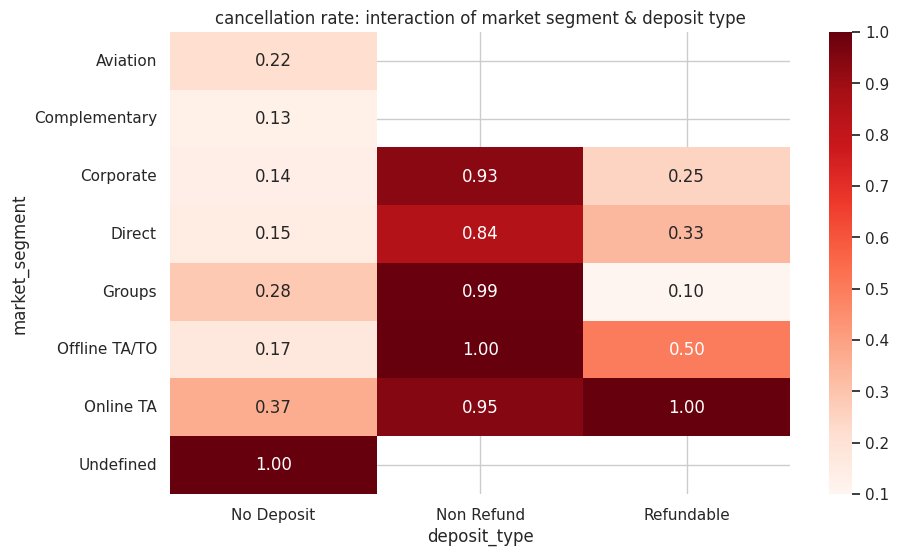

In [ ]:
# create a pivot table using 3 variables: market_segment, deposit_type, and is_canceled
# we calculate the mean of is_canceled to get the "cancellation rate"
pivot = df.pivot_table(index="market_segment", columns="deposit_type", values="is_canceled", aggfunc="mean")

# visualize the interaction with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="Reds", fmt=".2f")
plt.title("cancellation rate: interaction of market segment & deposit type")
plt.show()

### final conclusion & insights

**summary of findings:**
* **outliers:** variables like `lead_time` and `adr` contain extreme outliers (e.g., adr > 5000) that distort averages and should be removed for predictive modeling.
* **cancellations:** there is a direct link between planning and cancelling. guests who book far in advance are significantly more likely to cancel than those who book last minute.
* **seasonality:** resort hotels show extreme price fluctuation (peaking in august), while city hotels are more stable but generally expensive year-round.
* **guest value:** repeated guests are highly valuable; they are less likely to cancel and require shorter lead times.
* **anomalies:** the combination of "non-refund" deposits and "groups" market segment shows a near 100% cancellation rate, indicating a likely data error or a specific business issue with group contracting.

**recommendation:**
focus marketing efforts on encouraging repeated guests and last-minute bookings to reduce cancellation rates. investigate the "non-refund" group bookings to prevent revenue loss.